1. Importing Necessary Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import sklearn
import scipy
import seaborn as sb
import missingno as msno
import warnings

2. Importing the Dataset



In [3]:
data=pd.read_csv("weatherAUS.csv")


3. Analyse the data



In [4]:
data.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,116359.000000,116552.000000,114747.000000,65741.000000,60591.000000,107865.000000,116059.000000,114768.000000,115246.000000,114144.000000,106810.000000,106845.000000,72883.000000,70048.000000,116037.000000,114875.000000
mean,11.981979,22.754579,2.412014,5.309226,7.418907,39.963176,14.005635,18.849061,70.293173,52.776195,1018.038022,1015.715663,4.606067,4.647056,16.607275,21.271741
std,6.240834,6.890165,8.615556,4.270951,3.821951,13.844547,9.137934,9.129298,18.246413,20.500002,7.008407,6.905740,2.867922,2.697685,6.264320,6.710586
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000
25%,7.500000,17.700000,0.000000,2.600000,4.500000,30.000000,7.000000,13.000000,59.000000,38.000000,1013.400000,1011.100000,1.000000,2.000000,12.100000,16.400000
50%,11.900000,22.300000,0.000000,4.400000,8.200000,39.000000,13.000000,19.000000,71.000000,53.000000,1018.000000,1015.700000,6.000000,5.000000,16.500000,20.900000
75%,16.600000,27.500000,0.800000,7.000000,10.500000,48.000000,19.000000,24.000000,84.000000,67.000000,1022.700000,1020.300000,7.000000,7.000000,21.100000,25.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1038.200000,9.000000,9.000000,40.200000,46.700000


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117676 entries, 0 to 117675
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           117676 non-null  object 
 1   Location       117676 non-null  object 
 2   MinTemp        116359 non-null  float64
 3   MaxTemp        116552 non-null  float64
 4   Rainfall       114747 non-null  float64
 5   Evaporation    65741 non-null   float64
 6   Sunshine       60591 non-null   float64
 7   WindGustDir    107839 non-null  object 
 8   WindGustSpeed  107865 non-null  float64
 9   WindDir9am     108533 non-null  object 
 10  WindDir3pm     113750 non-null  object 
 11  WindSpeed9am   116059 non-null  float64
 12  WindSpeed3pm   114768 non-null  float64
 13  Humidity9am    115246 non-null  float64
 14  Humidity3pm    114144 non-null  float64
 15  Pressure9am    106810 non-null  float64
 16  Pressure3pm    106845 non-null  float64
 17  Cloud9am       72883 non-null

4. Handling Missing Values

In [6]:
data.isnull().sum()


Date                 0
Location             0
MinTemp           1317
MaxTemp           1124
Rainfall          2929
Evaporation      51935
Sunshine         57085
WindGustDir       9837
WindGustSpeed     9811
WindDir9am        9143
WindDir3pm        3926
WindSpeed9am      1617
WindSpeed3pm      2908
Humidity9am       2430
Humidity3pm       3532
Pressure9am      10866
Pressure3pm      10831
Cloud9am         44793
Cloud3pm         47628
Temp9am           1639
Temp3pm           2801
RainToday         2930
RainTomorrow      2932
dtype: int64

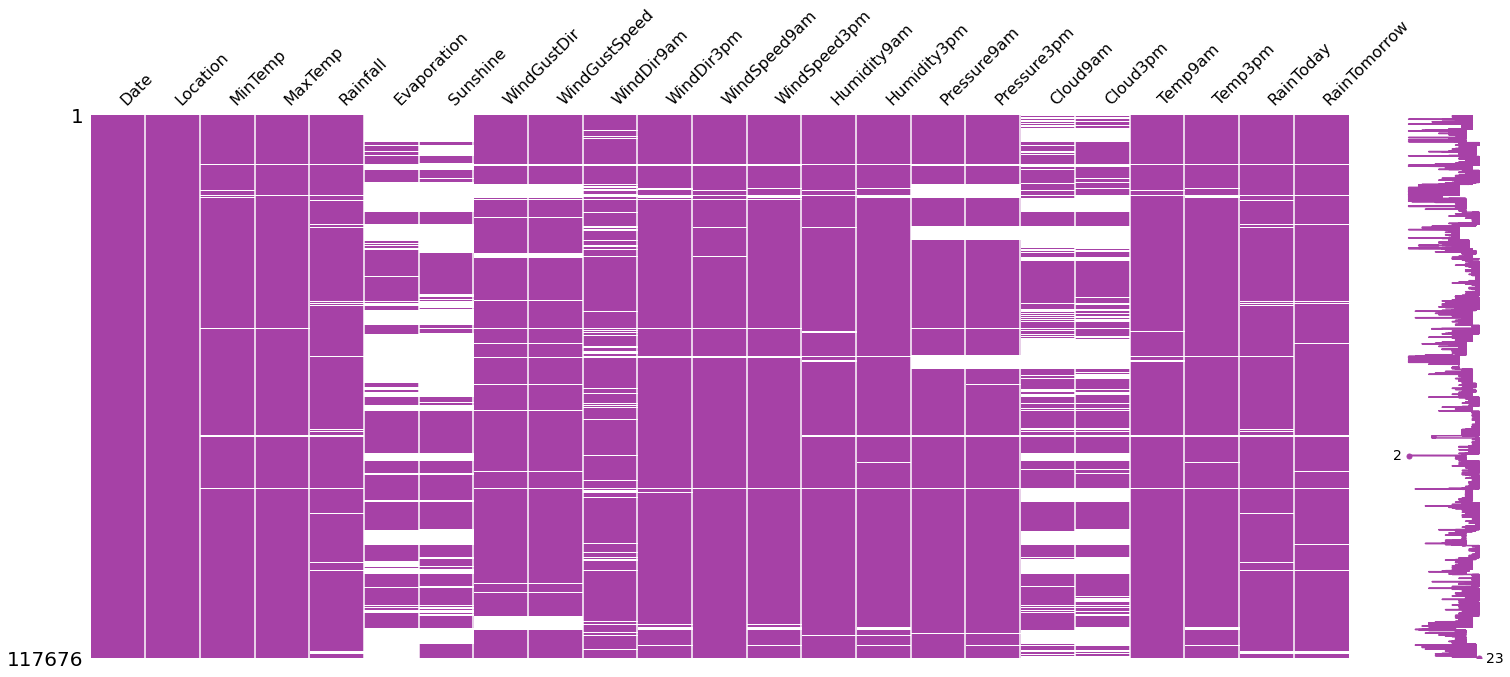

In [9]:
import missingno as msno
msno.matrix(data,color=(0.654,0.255,0.654),fontsize=16)


In [10]:
data_c=data[["RainToday","WindGustDir","WindDir9am","WindDir3pm"]]


In [11]:
data.drop(columns=["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1,inplace=True)
data.drop(columns=["RainToday","WindGustDir","WindDir9am","WindDir3pm"],axis=1,inplace=True)


In [12]:
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)


In [13]:
c_names=data_c.columns
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
data_c=imp_mode.fit_transform(data_c)
data_c=pd.DataFrame(data_c,columns=c_names)
data_c.tail()


,RainToday,WindGustDir,WindDir9am,WindDir3pm
117671,No,WSW,NE,WSW
117672,No,SE,SE,ESE
117673,No,E,ESE,SE
117674,No,WSW,N,WSW
117675,No,SSW,SSW,WSW


In [14]:
data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No


In [15]:
data=pd.concat([data,data_c],axis=1)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,W,W,WNW
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,WNW,NNW,WSW
2,2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,WSW,W,WSW
3,2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,NE,SE,E
4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,W,ENE,NW


5.Data Visualisation

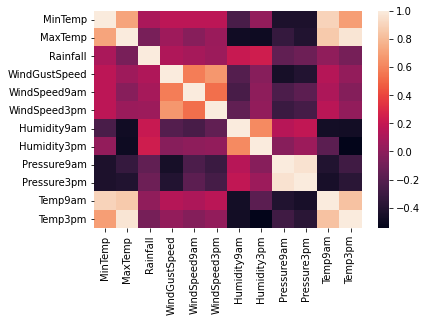

In [16]:
corr=data.corr()
sb.heatmap(data=corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


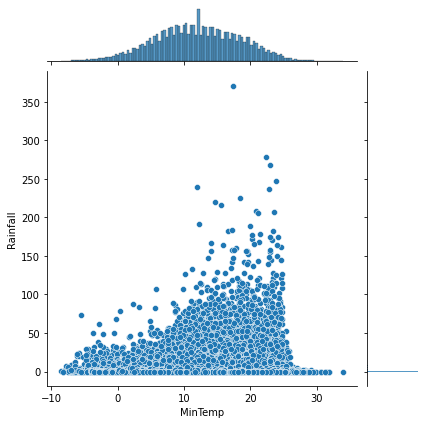

In [17]:
sb.jointplot(data["MinTemp"],data['Rainfall'])


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


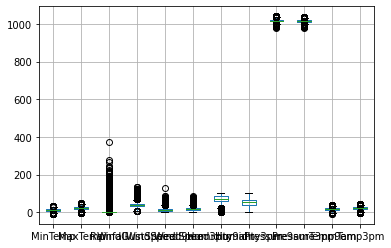

In [18]:
data.boxplot()


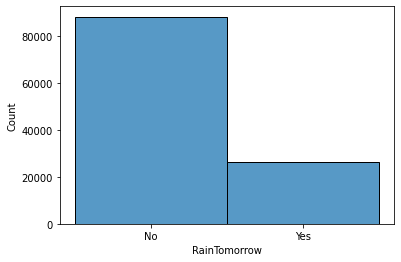

In [19]:
sb.histplot(data['RainTomorrow'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


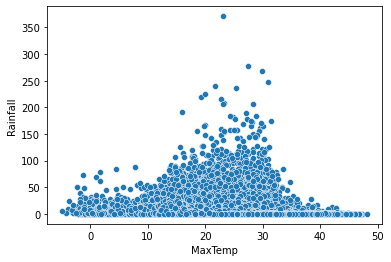

In [20]:
sb.scatterplot(data['MaxTemp'],data['Rainfall'])


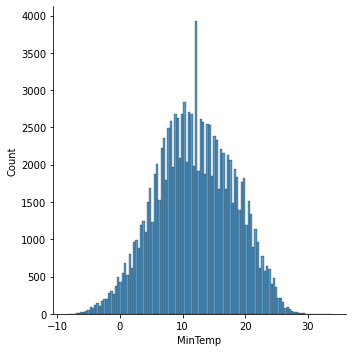

In [21]:
sb.displot(data['MinTemp'])


6. Splitting The Dateset Into Dependent And Independent Variable



In [22]:
from sklearn.preprocessing import StandardScaler
data = data[data['RainTomorrow'].notnull()]
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)
set(y)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


{'No', 'Yes'}

In [23]:
x=x.drop('Date',axis=1)
names=x.columns
names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [24]:
sc=StandardScaler()
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
print(len(x),len(y))

114744 114744


7. Label Encoding



In [25]:
LE = LabelEncoder()
x['Location'] = LE.fit_transform(x['Location'])
x.head()

LE = LabelEncoder()
x['RainToday'] = LE.fit_transform(x['RainToday'])
x.head()

LE = LabelEncoder()
x['WindGustDir'] = LE.fit_transform(x['WindGustDir'])
x.head()

LE = LabelEncoder()
x['WindDir9am'] = LE.fit_transform(x['WindDir9am'])
x.head()

LE = LabelEncoder()
x['WindDir3pm'] = LE.fit_transform(x['WindDir3pm'])
x.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,2,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,13,13,14
1,2,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,14,6,15
2,2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,15,13,15
3,2,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,4,9,0
4,2,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,13,1,7


In [26]:
LE = LabelEncoder()
y=pd.DataFrame(y)
y = LE.fit_transform(y)
print(len(x),len(y))

114744 114744


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
sc=StandardScaler()
x=sc.fit_transform(x)
x[:6]

array([[-1.46777032,  0.23001664,  0.0218848 , -0.21056865,  0.30859267,
         0.66690157,  0.57425345,  0.03964877, -1.51736666, -1.54504131,
        -1.30696923,  0.04885308,  0.08034527, -0.54026451,  1.00960642,
         1.26877752,  1.3104739 ],
       [-1.46777032, -0.73369277,  0.34188104, -0.28068579,  0.30859267,
        -1.09827314,  0.35263648, -1.44922665, -1.36929739, -1.11208305,
        -1.20091615,  0.09693006,  0.45631879, -0.54026451,  1.22294228,
        -0.28403031,  1.52594335],
       [-1.46777032,  0.14970752,  0.42915274, -0.28068579,  0.45922331,
         0.55657815,  0.79587043, -1.78008785, -1.12251526, -1.5599709 ,
        -1.06456217,  0.70590515,  0.29089044, -0.54026451,  1.43627813,
         1.26877752,  1.52594335],
       [-1.46777032, -0.44457995,  0.76369426, -0.28068579, -1.19771369,
        -0.3260092 , -1.08787385, -1.39408311, -1.81350522, -0.06701137,
        -0.44339409,  0.241161  ,  0.78717549, -0.54026451, -0.91041632,
         0.38145876

In [28]:
x=pd.DataFrame(x,columns=names)


8. Splitting The Data Into Train And Test



In [29]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=0)

9. Training And Testing The Model



In [30]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
np.any(np.isnan(x))
GBC.fit(x_train,y_train)
RFC.fit(x_train,y_train)
data.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainTomorrow     False
RainToday        False
WindGustDir      False
WindDir9am       False
WindDir3pm       False
dtype: bool

In [31]:
x.isnull().any()


Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainToday        False
WindGustDir      False
WindDir9am       False
WindDir3pm       False
dtype: bool

In [32]:
p1=RFC.predict(x_train)
p2=RFC.predict(x_test)


10. Model Evaluation



In [33]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(y_train,p1))
print(metrics.accuracy_score(y_test,p2))

0.9999455308023313
0.8492309033073336


11. Save The Model



In [34]:
import pickle
pickle.dump(RFC,open('rainfall.pkl','wb'))
pickle.dump(LE,open('encoder.pkl','wb'))
pickle.dump(imp_mode,open('imputer.pkl','wb'))
pickle.dump(sc,open('scale.pkl','wb'))